## Supplemental Figure 1 - bin score by completeness

In [1]:
import pandas as pd
import seaborn as sns
from math import log
from matplotlib import pyplot as plt

In [2]:
def create_plot_df(dataset, bins, clusters, depths):
    bins = pd.read_csv(bins, sep="\t", index_col=0)
    clusters = pd.read_csv(clusters, sep="\t", index_col=0, header=None)
    depths = pd.read_csv(depths, sep="\t", index_col=0)
    samples = depths[[i for i in depths.columns if isinstance(i, str) and i.endswith("bam")]].copy()
    for col in samples.columns:
        depths.loc[:, col] = (samples[col] / depths["contigLen"] / samples[col].sum()) * 1e9
    clusters = depths.merge(clusters, left_index=True, right_index=True)
    clusters = clusters.merge(bins, left_on=1, right_index=True)
    clusters.columns = [str(i) for i in clusters.columns]
    depths = clusters[[i for i in clusters.columns if i.endswith("bam")] + ["1",]].groupby("1").sum()
    sum_depths = depths.sum(axis=1).apply(lambda n: log(n))
    sum_depths.name = "Sequencing depth (normalised)"
    df = bins.merge(sum_depths, left_index=True, right_index=True)
    df["Bin score"] = df["bin_score"]
    df["dataset"] = dataset
    return df

In [3]:
marmg_bins = "../review/marmg_cacb/cobinning_DASTool_summary.tsv"
marmg_clusters = "../review/marmg_cacb/cobinning_DASTool_contig2bin.tsv"
marmg_depths = "../review/marmg_cacb/bam_contigs_depths.txt"
marmg_df = create_plot_df("marmg_cacb", marmg_bins, marmg_clusters, marmg_depths)

strmg_bins = "../review/strmg_cacb/cobinning_DASTool_summary.tsv"
strmg_clusters = "../review/strmg_cacb/cobinning_DASTool_contig2bin.tsv"
strmg_depths = "../review/strmg_cacb/bam_contigs_depths.txt"
strmg_df = create_plot_df("strmg_cacb", strmg_bins, strmg_clusters, strmg_depths)
df = pd.concat([marmg_df, strmg_df])

/Users/vwsalazar/miniconda3/envs/data/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/vwsalazar/miniconda3/envs/data/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


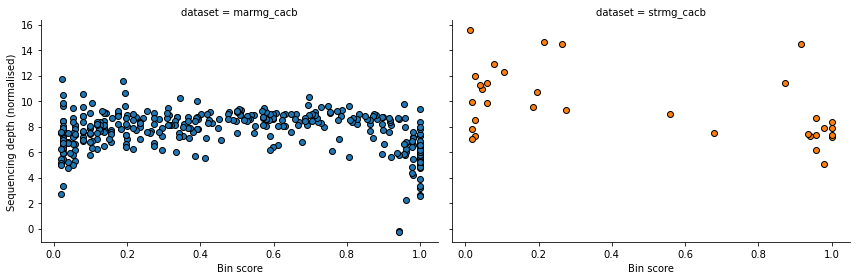

In [4]:
g2 = sns.FacetGrid(df, col="dataset", height=4, aspect=1.5, hue="dataset")
g2.map(plt.scatter, "Bin score", "Sequencing depth (normalised)", edgecolor="k")
plt.savefig("../figures/Figure_A_review.png", dpi=400, bbox_inches="tight")

### Strain Madness report

In [5]:
strmg_cacb_gtdb = pd.read_csv("../review/strmg_cacb/gtdbtk.bac120.summary.tsv", sep="\t", index_col=0)
strmg_cacb_gtdb = strmg_cacb_gtdb.merge(strmg_df, left_index=True, right_index=True)
lineage = strmg_cacb_gtdb["classification"].str.split(";", expand=True)
lineage.columns = "Domain Phylum Class Order Family Genus Species".split()
strmg_cacb_gtdb[["bin_score", "SCG_completeness", "SCG_redundancy"]].merge(lineage, left_index=True, right_index=True).sort_values("bin_score", ascending=False)

,bin_score,SCG_completeness,SCG_redundancy,Domain,Phylum,Class,Order,Family,Genus,Species
metabat2.1221,1.000000,100,0,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__Bacteroides sp002491635
concoct.122,1.000000,100,0,d__Bacteria,p__Bacillota,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__Lactobacillus intestinalis
vamb.S1C5590,1.000000,100,0,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Phocaeicola,s__Phocaeicola sartorii
metabat2.4898,1.000000,100,0,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Tannerellaceae,g__Parabacteroides,s__Parabacteroides goldsteinii
concoct.156,0.980392,98,0,d__Bacteria,p__Actinomycetota,c__Actinomycetia,o__Propionibacteriales,f__Propionibacteriaceae,g__Cutibacterium,s__Cutibacterium acnes
concoct.148,0.978431,100,2,d__Bacteria,p__Bacillota,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__Lactobacillus taiwanensis
concoct.92,0.956863,100,4,d__Bacteria,p__Bacillota,c__Bacilli,o__Paenibacillales,f__Paenibacillaceae,g__Paenibacillus,s__Paenibacillus lautus_A
concoct.121,0.956863,100,4,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Tannerellaceae,g__Parabacteroides,s__Parabacteroides distasonis
metabat2.328,0.956863,100,4,d__Bacteria,p__Bacillota,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Limosilactobacillus,s__Limosilactobacillus reuteri
vamb.S1C971,0.941176,94,0,d__Bacteria,p__Bacillota,c__Bacilli,o__Lactobacillales,f__Enterococcaceae,g__Enterococcus,s__Enterococcus faecalis


In [6]:
strmg_cacb_gtdb = pd.read_csv("./strmg-overview/strmg_cacb/gtdbtk_drep/gtdbtk.bac120.summary.tsv", sep="\t", index_col=0)
strmg_cacb_gtdb = strmg_cacb_gtdb.merge(strmg_df, left_index=True, right_index=True)
lineage = strmg_cacb_gtdb["classification"].str.split(";", expand=True)
lineage.columns = "Domain Phylum Class Order Family Genus Species".split()
lineage = lineage.apply(lambda col: col.str[3:].str.replace("lassified", "Uncl))
strmg_cacb_gtdb[["bin_score", "SCG_completeness", "SCG_redundancy", "fastani_reference"]].merge(lineage, left_index=True, right_index=True).sort_values("bin_score", ascending=False).to_csv("../review/strmg_cacb/strmg_cacb_gtdb_drep_fmt.csv")

SyntaxError: unterminated string literal (detected at line 5) (4119156742.py, line 5)